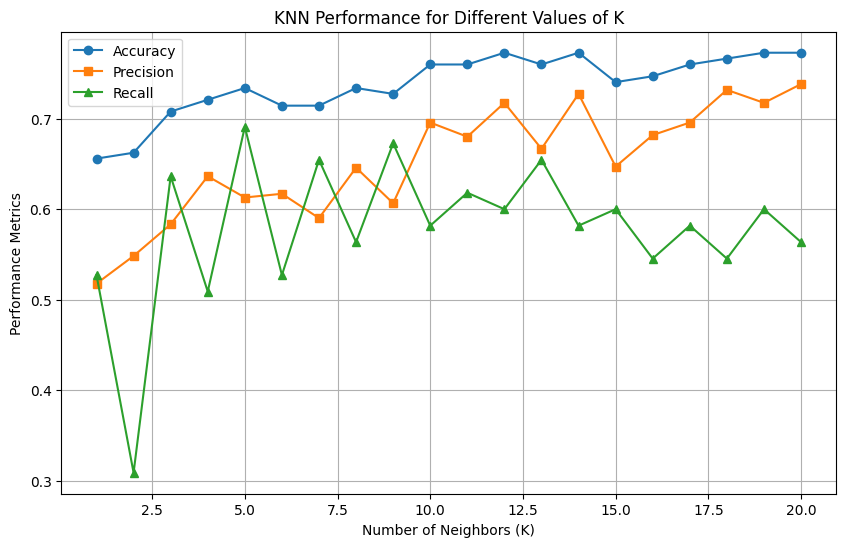

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import itertools

# Load the dataset
file_path = "diabetes.csv"
df = pd.read_csv(file_path)

# Handle missing or unrealistic values
def preprocess_data(df):
    cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
    df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)
    df.fillna(df.median(), inplace=True)
    return df

df = preprocess_data(df)

# Feature Scaling
X = df.drop(columns=["Outcome"])
y = df["Outcome"]
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement KNN and find the optimal K
def evaluate_knn(k):
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    return acc, prec, rec, y_pred

k_values = list(range(1, 21))
results = [evaluate_knn(k) for k in k_values]
accuracies = [res[0] for res in results]
precisions = [res[1] for res in results]
recalls = [res[2] for res in results]

# Plot performance metrics
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', label='Accuracy')
plt.plot(k_values, precisions, marker='s', label='Precision')
plt.plot(k_values, recalls, marker='^', label='Recall')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Performance Metrics')
plt.title('KNN Performance for Different Values of K')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Select the best K
optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal K: {optimal_k}")

# Train final model with optimal K
final_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
final_knn.fit(X_train, y_train)
y_pred_final = final_knn.predict(X_test)

# Performance Evaluation
print("Final Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_final):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_final):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_final))

Optimal K: 12
Final Model Evaluation:
Accuracy: 0.7727
Precision: 0.7174
Recall: 0.6000
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.60      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



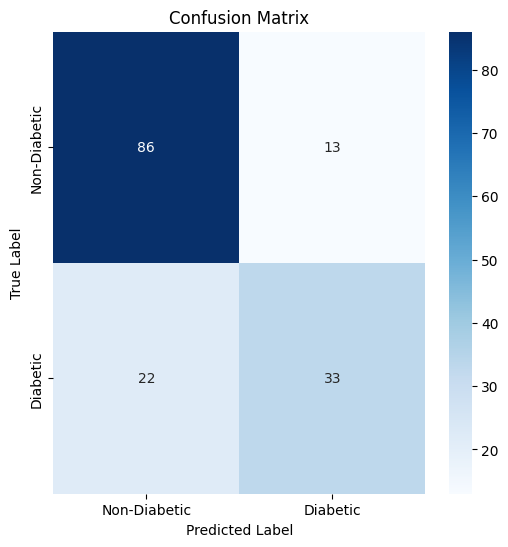

In [ ]:
# Confusion Matrix Visualization
def plot_confusion_matrix(y_true, y_pred, classes, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, y_pred_final, classes=["Non-Diabetic", "Diabetic"])

1. Identify any two limitations of KNN for this dataset.

a. Computational Complexity: KNN is slow for large datasets since it computes distances for every test point, making it inefficient.

b. Sensitivity to Irrelevant Features: KNN's performance can degrade if irrelevant or highly correlated features are present, requiring careful feature selection and scaling.

2. What happens when K is too small or too large?

Small K (e.g., 1-2): High variance, sensitive to noise, risk of overfitting.

Large K (e.g., 50+): High bias, smooth decision boundaries, risk of underfitting.